In [1]:
from graphs import *

# Part 1. Visualize Attention

## 1.1. Choose a Model to Load
### Load MNIST Model

In [2]:
modelpath = "../saved/models/paper_mnist_model.pt" #path to the saved model
modeltype = "mnist" #type of model: 'mnist' or 'coco'
n = 2 #number of objects
strength = 0.2 #strength of attention
net, runner, test_loader = load_model_and_data(modelpath, n = n, strength = strength, modeltype = modeltype)

MNIST Object Based Attention Model v2
../mnist
Data Loaded:
	Training Samples:  42000
	Validation Samples:  18000
	Testing Samples:  10000
	Objects:  2 	Strength:  0.2 	Noise:  0.3 	Resample:  True


### ... OR Load COCO Model

In [ ]:
modelpath = "../saved/models/paper_coco_model.pt" #path to the saved model
modeltype = "coco" #type of model: 'mnist' or 'coco'
cocoroot = '../../../../data/jordanlei/coco/images/val2017' #path to the coco val dataset
annpath = '../../../../data/jordanlei/coco/annotations/instances_val2017.json' #path to the coco val annotations
metadatapath = '../data/metadata/cocometadata_test.p' #path to metadata file (will create one if none exists)

n = 2 #number of objects
strength = 0.3 #strength of attention
net, runner, test_loader = load_model_and_data(modelpath, n = n, strength = strength, modeltype = modeltype,\
                                               cocoroot = cocoroot, annpath = annpath, metadatapath = metadatapath)

## 1.2 Show Images

INPUT IMAGE


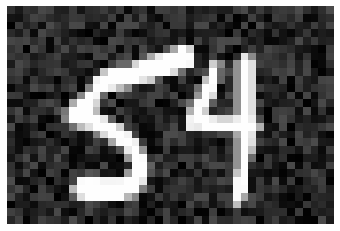

PHASE 1
	masked input


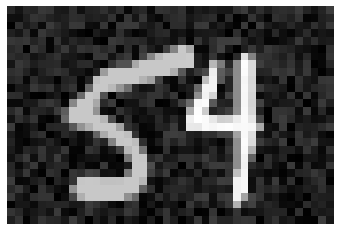

	attention mask


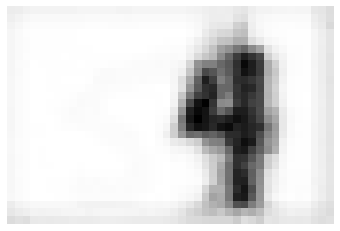

	IOR (for next phase)


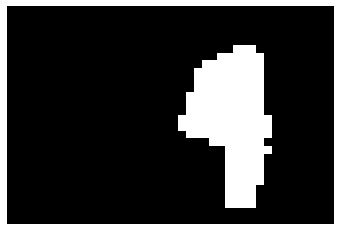

PHASE 2
	masked input


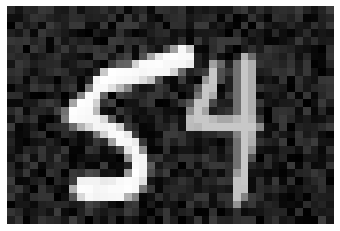

	attention mask


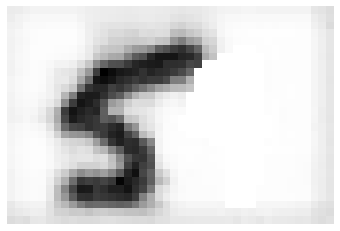

	IOR (for next phase)


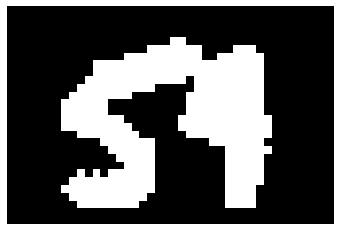

In [3]:
for i, (x, data, labels) in enumerate(test_loader):
    print("INPUT IMAGE")
    toshow(x[0].detach().cpu().numpy())
    masks, hiddens, ior, _ = runner.visualize(x, data, labels)
    
    for j, mask in enumerate(masks): 
        hidden = hiddens[j]
        ior_mask = ior[j]
        
        print("PHASE %s"%(j + 1))
        print("\tmasked input")
        toshow(mask[0])
        print("\tattention mask")
        toshow(hidden[0])
        print("\tIOR (for next phase)")
        toshow(ior_mask[0] * 1.0)
    break

# Part 2. Plot Graphs

In [4]:
metric_files = ["model2.csv", "model3.csv", "model4.csv", "model5.csv"]

In [5]:
df = files_to_df(metric_files)
df.groupby(["lr","penalty"])["final_acc"].mean().unstack()

penalty,0.0,10.0,100.0,1000.0,10000.0
lr,,,,,
0.00001,0.648317,0.685928,0.719317,0.571106,0.161444
0.00010,0.963317,0.941128,0.961456,0.948428,0.782511
0.00100,0.948606,0.880111,0.963994,0.976278,0.966989
0.01000,0.109061,0.185172,0.113444,0.216433,0.226917


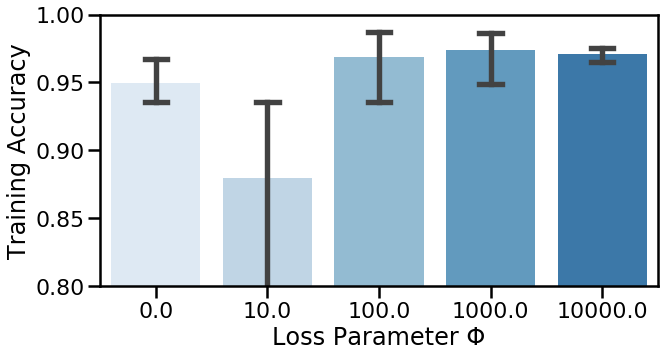

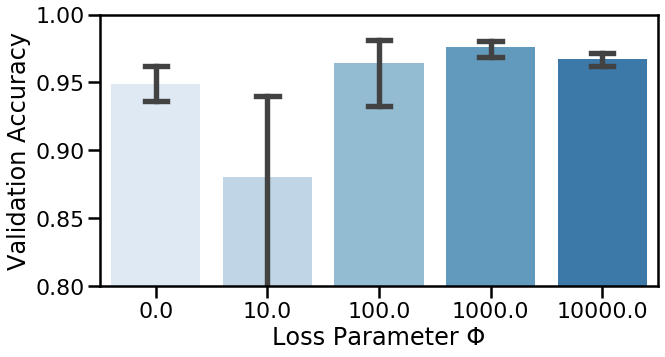

In [6]:
df = df[df["lr"] == 0.001]
sns.set_palette("Blues")
plot_boxplots(df, save = False)

# Part 3. Inhibition Plots
## If MNIST model...

MNIST Object Based Attention Model v2
../mnist
Data Loaded:
	Training Samples:  42000
	Validation Samples:  18000
	Testing Samples:  10000
	Objects:  2 	Strength:  0.2 	Noise:  0.3 	Resample:  True
Processing. Please Wait...
0 %
3 %
6 %
9 %
13 %
16 %
19 %
23 %
26 %
29 %
33 %
36 %
39 %
43 %
46 %
49 %
53 %
56 %
59 %
63 %
66 %
69 %
73 %
76 %
79 %
83 %
86 %
89 %
93 %
96 %
99 %
Mean Inhibition for Attended vs Not Attended
              inhibition
condition               
Attended        0.112645
Not Attended    0.907094
SD Inhibition for Attended vs Not Attended
              inhibition
condition               
Attended        0.029567
Not Attended    0.011021
	T Statistic 2265.2139432016356	P Value: 0.0


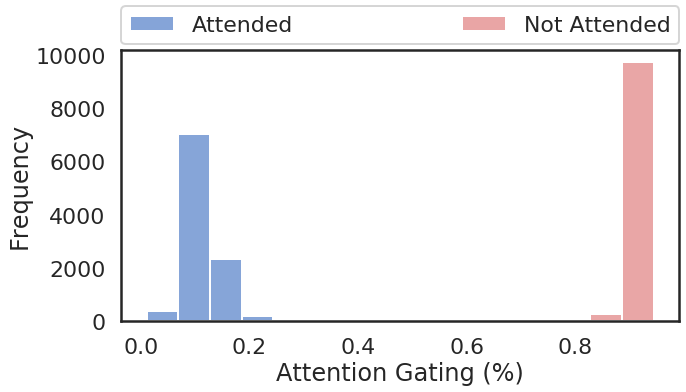

In [7]:
inhibition_plot(modelpath, modeltype='mnist', n=2, strength=0.2)

## Or COCO model...

In [ ]:
inhibition_plot(modelpath, modeltype='coco', n=2, strength=0.3, cocoroot=cocoroot, \
                annpath=annpath, metadatapath=metadatapath, save = True)